# Projection Plots

<div class="alert alert-block alert-info">
 
## Goals:

* Introduce `ProjectPlot` class and understand the difference from `SlicePlot`
* Introduce off-axis plots
* Learn how to annotate projection plots and change their style
    
</div>

In [3]:
import yt

In [4]:
ds = yt.load_sample("IsolatedGalaxy")

Now we can load the data.  This particular dataset is actually a directory and we need to point to a file in a subdirectory:

In [5]:
ds = yt.load("IsolatedGalaxy/galaxy0030/galaxy0030")

yt : [INFO     ] 2020-03-22 13:28:51,115 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2020-03-22 13:28:51,116 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-03-22 13:28:51,117 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-03-22 13:28:51,118 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-03-22 13:28:51,119 Parameters: cosmological_simulation   = 0.0


## A First Plot

A slice plot is simply passing a plane through your dataset and recording the data values that the plane intersects.  

A projection plot is the result of integrating the data through the domain along a particular direction.

Both of these operations results in a 2-d representation of 3-d data.

Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 4872.81it/s]
yt : [INFO     ] 2020-03-22 14:50:04,936 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-03-22 14:50:07,667 Projection completed
yt : [INFO     ] 2020-03-22 14:50:07,680 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 14:50:07,681 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 14:50:07,683 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 14:50:07,684 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 14:50:07,697 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



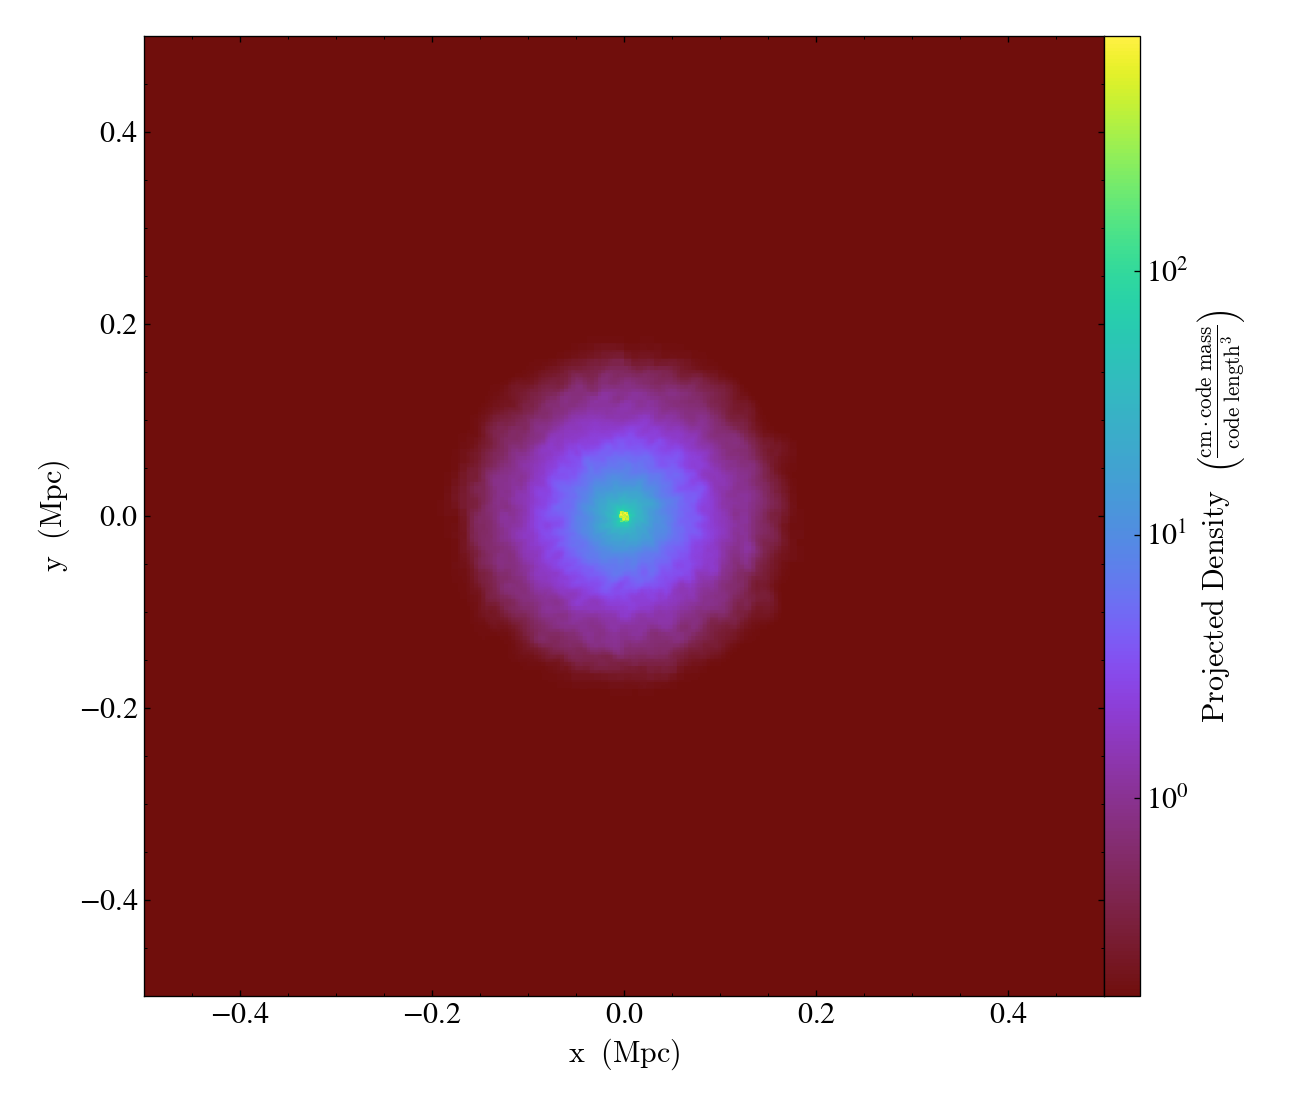

In [6]:
yt.ProjectionPlot(ds, "z", "Density")

Compare to the similar slice plot

yt : [INFO     ] 2020-03-22 14:51:06,081 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 14:51:06,082 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 14:51:06,084 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 14:51:06,084 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 14:51:06,086 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



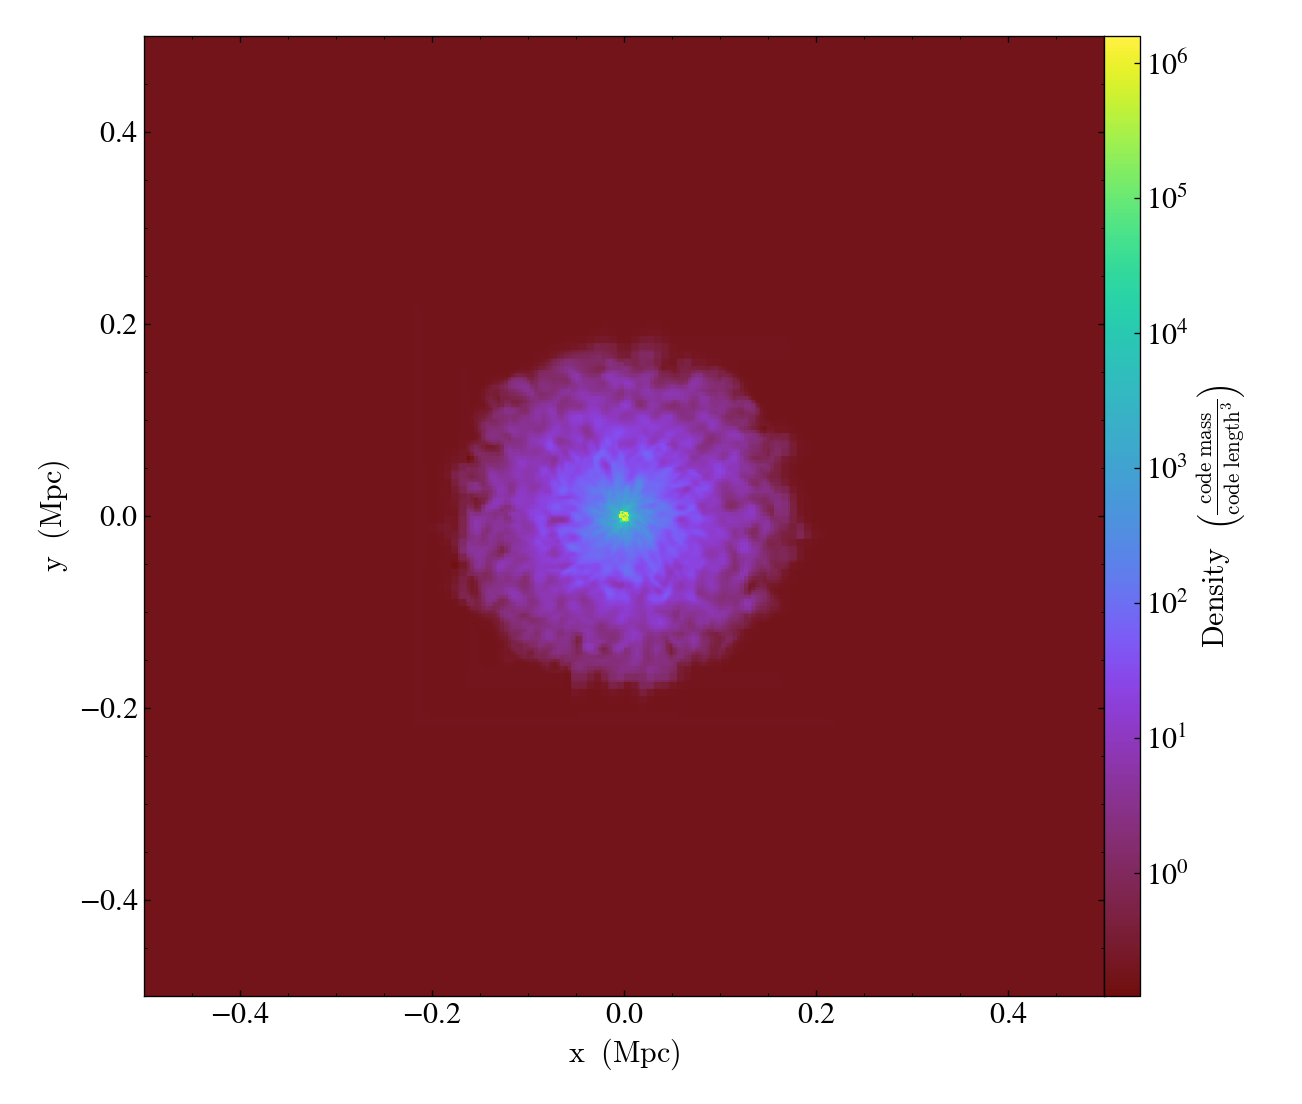

In [7]:
yt.SlicePlot(ds, "z", "Density")

Some observations:
    
* The units on the color scale are different, representing that one is a slice and the other is an integral
* The finer structure that appears in the slice is not as strong in the projection

## Projection Types

### unweighted 

The default projection is an *unweighted projection*.

An unweighted projection along the z-direction does the following integral:
$$
F(x, y) = \int f(x, y, z) dz
$$
Here, $f(x, y, z)$ are the data values for our chosen field (`"Density"` in the above image), and $F(x, y)$ is the resulting projection / image.  Notice that it is two-dimensional, since we integrated out one of the dimension.

For a projection in an arbitrary direction, we'd write:
$$
F(q_1, q_2) = \int f({\bf x}) \hat{{\bf n}} \cdot d{\bf x}
$$
where $\hat{\bf n}$ is the unit normal and $q_1$ and $q_2$ are the two coordinate directions orthognal to $\hat{\bf n}$.

Now notice in this form that the units are the units of $f$ $\times$ `length`.

### weighted

A weighted projection along the z-direction does the following integral:
$$
F(x, y) = \frac{\int f(x, y, z) w(x, y, z) dz}{\int w(x, y, z) dz}
$$
Here, $w(x, y, z)$ is another field from your dataset and acts as a weight.  

Note: due to the normalization, the resulting projection, $F(x, y)$ has the same units as $f(x, y, z)$.

The general form is:
$$
F(q_1, q_2) = \frac{\int f({\bf x}) w({\bf x}) \hat{\bf n} \cdot d{\bf x}}
                   {\int w({\bf x}) \hat{\bf n} \cdot d{\bf x}}
                   $$

see https://yt-project.org/docs/dev/visualizing/plots.html#types-of-projections for more details

## Weighted Projection

Let's make a density-weighted projection of temperature

yt : [INFO     ] 2020-03-22 15:32:59,010 Projection completed
yt : [INFO     ] 2020-03-22 15:32:59,011 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:32:59,012 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:32:59,013 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:32:59,014 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:32:59,016 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2020-03-22 15:32:59,164 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



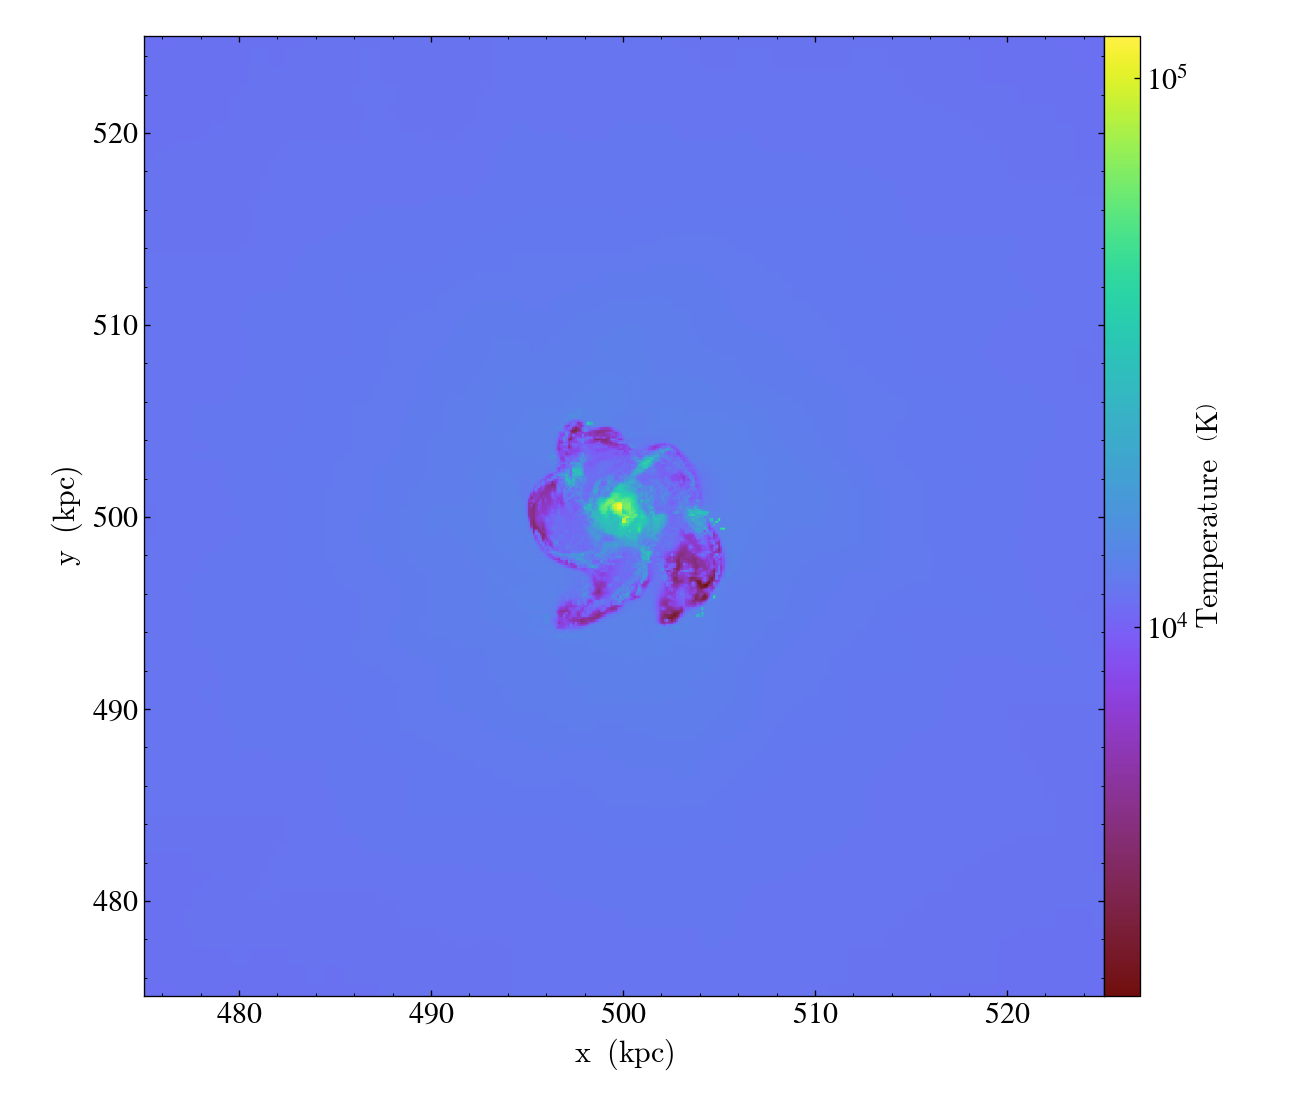

In [13]:
p = yt.ProjectionPlot(ds, "z", "temperature", weight_field="density", origin="native")
p.zoom(20)

Compare to the corresponding unweighted projection:

yt : [INFO     ] 2020-03-22 15:34:50,185 Projection completed
yt : [INFO     ] 2020-03-22 15:34:50,186 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:34:50,187 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:34:50,188 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:34:50,189 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:34:50,191 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2020-03-22 15:34:50,357 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



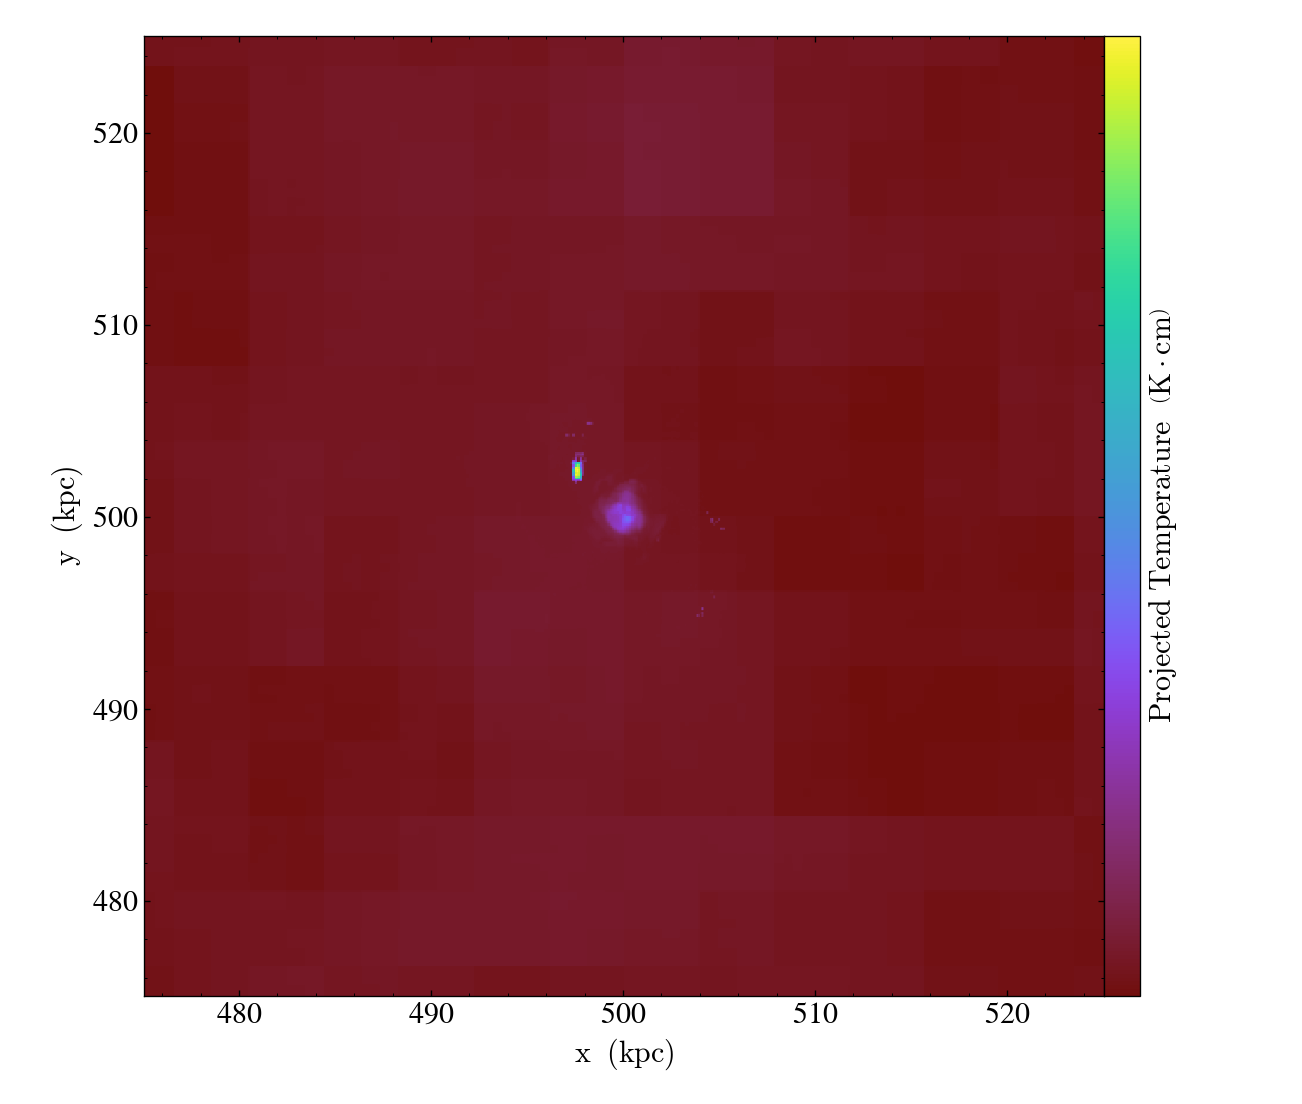

In [15]:
p = yt.ProjectionPlot(ds, "z", "temperature", origin="native")
p.zoom(20)

and the corresponding slice plot:

yt : [INFO     ] 2020-03-22 15:35:23,872 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:35:23,877 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:35:23,878 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:35:23,879 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:35:23,881 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2020-03-22 15:35:24,062 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



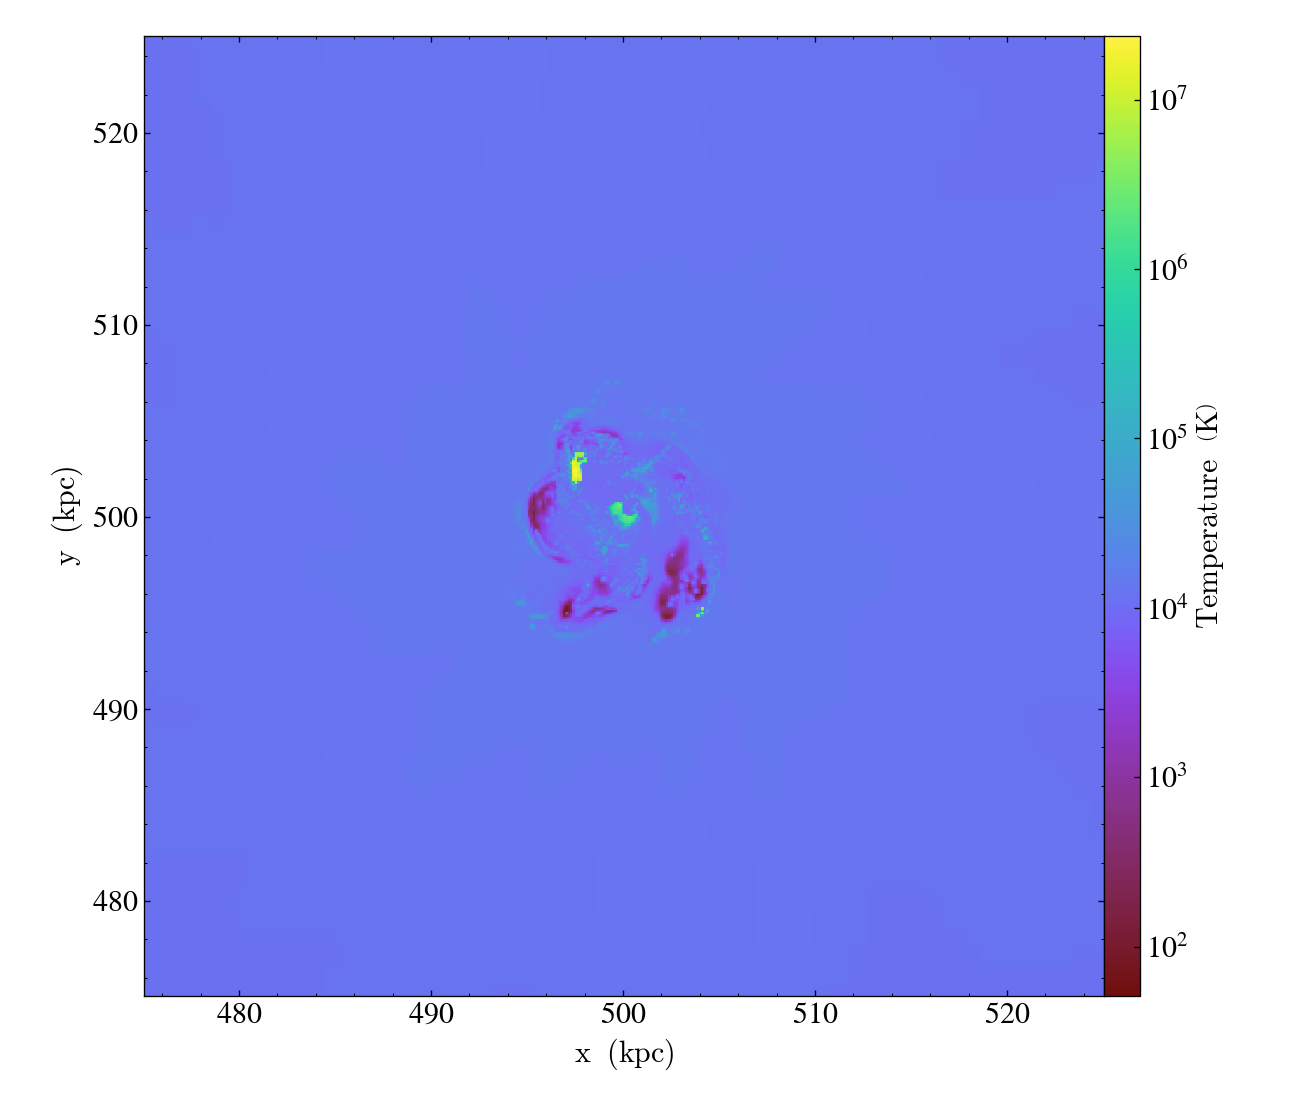

In [16]:
sp = yt.SlicePlot(ds, "z", "temperature", origin="native")
sp.zoom(20)

## Thin-Slice Projections

Here, instead of doing the integral over the full z-extent to the domain, we limit it to a narrow region.  In the limit that the width of the region goes to one zone in our simulation, the projection will approach a slice plot

https://yt-project.org/docs/dev/cookbook/complex_plots.html#thin-slice-projections

We start by making a region the full extent in x and y, but just 20 kpc in z, centered on the center of the domain

In [28]:
center = ds.domain_center
lower_left = ds.domain_left_edge
upper_right = ds.domain_right_edge

depth = ds.quan(40, "kpc")

lower_left[2] = center[2] - 0.5*depth
upper_right[2] = lower_left[2] + depth

region = ds.box(lower_left, upper_right)

In [29]:
print(region)

YTRegion (galaxy0030): , center=[1.543e+24 1.543e+24 1.543e+24] cm, left_edge=[0.00000000e+00 0.00000000e+00 1.48128645e+24] cm, right_edge=[3.08600000e+24 3.08600000e+24 1.60471355e+24] cm


Now when we make the projection, we use the keyword argument `data_source` to pass in the region to operate over

yt : [INFO     ] 2020-03-22 15:52:30,273 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:52:30,273 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:52:30,275 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:52:30,275 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 15:52:30,278 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



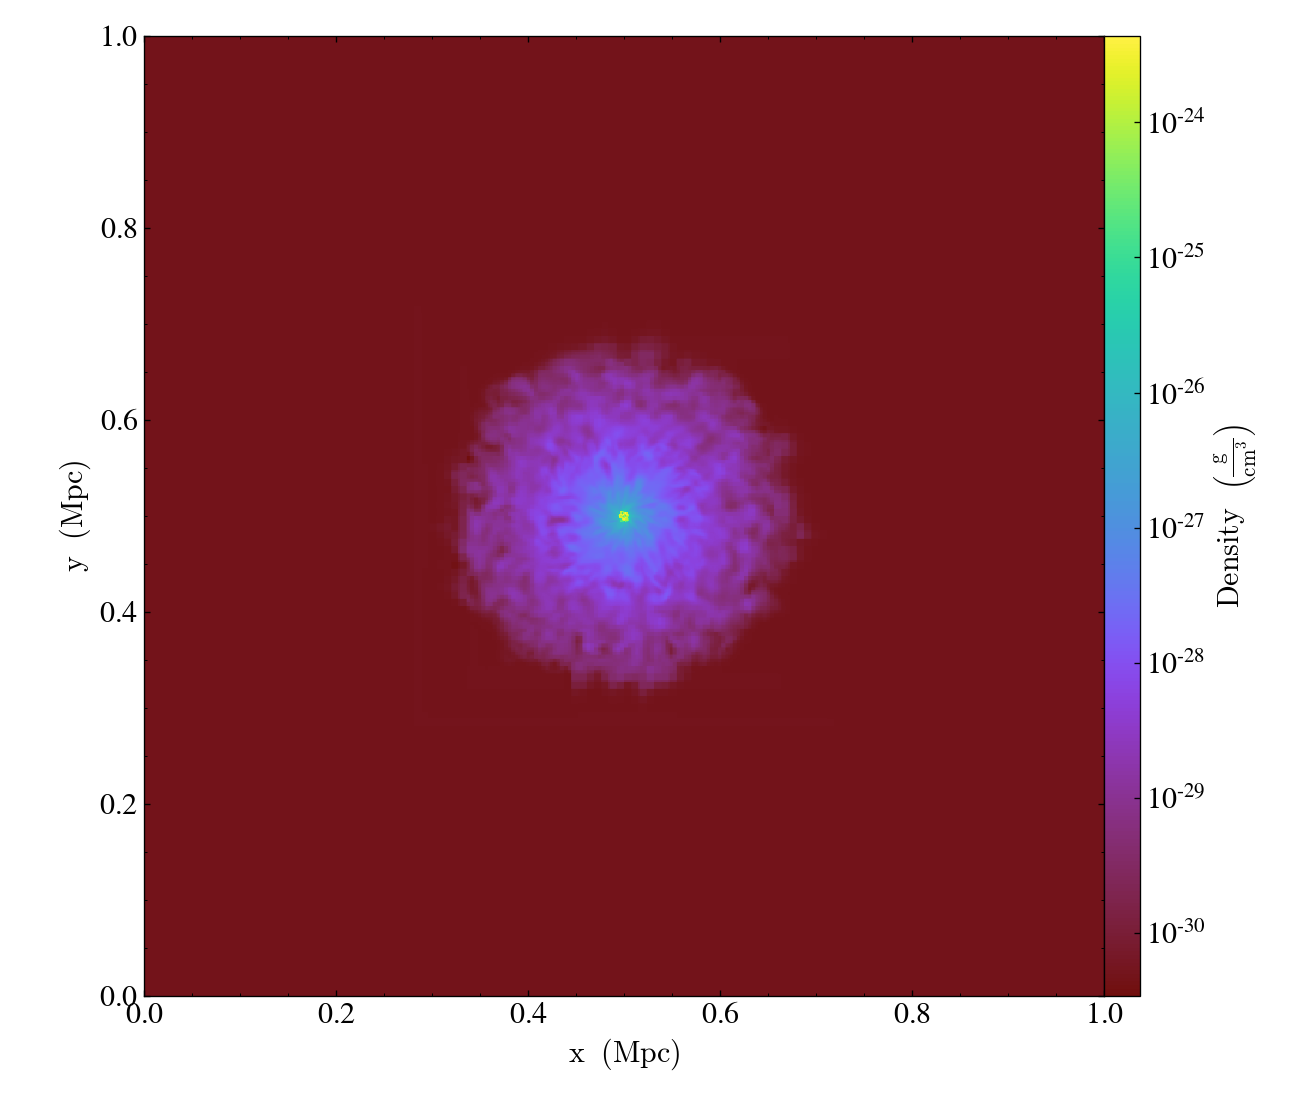

In [27]:
p = yt.SlicePlot(ds, "z", "density",
                      origin="native", data_source=region)
p

Important: zones only participate in the projection if their centers fall inside the region.  If you make this region too thin, then coarse zones (from the lower AMR levels) will not participate

## Off-Axis Projections

<div class="alert alert-block alert-warning">

## Afternoon Exercise
    
There are many more styling options.  Look at the docs for:
* `anotate_sphere()`
* `annotate_contour()`
* `annotate_streamlines()`
    
and experiment adding these annotations to your slices
</div>

## Annotating with Text